In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Oneday Debayan sir will give us a party",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is going to launch windows-12",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating banana"
]

In [2]:
#let's create the vectorizer and fit the corpus and transform them accordingly
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [6]:
print(v.vocabulary_)

{'oneday': 22, 'debayan': 9, 'sir': 25, 'will': 30, 'give': 13, 'us': 29, 'party': 23, 'apple': 5, 'is': 17, 'announcing': 4, 'new': 21, 'iphone': 16, 'tomorrow': 28, 'tesla': 26, 'model': 20, 'google': 15, 'pixel': 24, 'microsoft': 19, 'going': 14, 'to': 27, 'launch': 18, 'windows': 31, '12': 0, 'amazon': 2, 'eco': 12, 'dot': 10, 'am': 1, 'eating': 11, 'biryani': 8, 'and': 3, 'you': 32, 'are': 6, 'banana': 7}


In [7]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    
    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)
    
    #get the score
    idf_score = v.idf_[indx]
    
    print(f"{word} : {idf_score}")

12 : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.4700036292457357
apple : 2.386294361119891
are : 2.386294361119891
banana : 2.386294361119891
biryani : 2.386294361119891
debayan : 2.386294361119891
dot : 2.386294361119891
eating : 2.386294361119891
eco : 2.386294361119891
give : 2.386294361119891
going : 2.386294361119891
google : 2.386294361119891
iphone : 2.386294361119891
is : 1.2876820724517808
launch : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.4700036292457357
oneday : 2.386294361119891
party : 2.386294361119891
pixel : 2.386294361119891
sir : 2.386294361119891
tesla : 2.386294361119891
to : 2.386294361119891
tomorrow : 1.4700036292457357
us : 2.386294361119891
will : 2.386294361119891
windows : 2.386294361119891
you : 2.386294361119891


In [9]:
#let's print the transformed output from tf-idf
print(transform_output.toarray()[:2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.37796447 0.         0.
  0.         0.37796447 0.         0.         0.         0.
  0.         0.         0.         0.         0.37796447 0.37796447
  0.         0.37796447 0.         0.         0.         0.37796447
  0.37796447 0.         0.        ]
 [0.         0.         0.         0.         0.3326374  0.53997877
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.53997877 0.29138106
  0.         0.         0.         0.3326374  0.         0.
  0.         0.         0.         0.         0.3326374  0.
  0.         0.         0.        ]]


In [ ]:
# !python -m spacy download en

In [10]:
import spacy
# import neattext.functions as nfx
import neattext as nt

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text): 
    docx = nt.TextFrame(text)
    text = docx.remove_hashtags()
    text = docx.remove_stopwords(lang='en')
    text = docx.remove_userhandles()
    text = docx.remove_urls()
    text = docx.remove_emojis()
    text = docx.remove_html_tags()
    text = docx.remove_puncts()
    text = docx.remove_multiple_spaces()
    text = str(text)
    return text

In [11]:
print(preprocess("@xyz This is the mail      ,our #WEBSITE is https://example.com 😊."))

 mail our 


In [12]:
import pandas as pd

df_train = pd.read_csv( 'Corona_NLP_train.csv' , encoding='ISO-8859-1', index_col= False )
df_test = pd.read_csv('Corona_NLP_test.csv', encoding='ISO-8859-1', index_col= False )

In [13]:
df_train.shape, df_test.shape

((41157, 6), (3798, 6))

In [14]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [15]:
df_train.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [16]:
df_test.Sentiment.value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

In [17]:
min_samples = 5481 # we have these many SCIENCE articles and SCIENCE is our minority class

df_Positive = df_train[df_train.Sentiment=="Positive"].sample(min_samples, random_state=28)
df_negetive = df_train[df_train.Sentiment=="Negative"].sample(min_samples, random_state=28)
df_neutral = df_train[df_train.Sentiment=="Neutral"].sample(min_samples, random_state=28)
df_ex_positive = df_train[df_train.Sentiment=="Extremely Positive"].sample(min_samples, random_state=28)
df_ex_negetive = df_train[df_train.Sentiment=="Extremely Negative"].sample(min_samples, random_state=28)

In [18]:
df_balanced = pd.concat([df_Positive,df_negetive,df_neutral,df_ex_positive,df_ex_negetive],axis=0)
df_balanced.Sentiment.value_counts()

Positive              5481
Negative              5481
Neutral               5481
Extremely Positive    5481
Extremely Negative    5481
Name: Sentiment, dtype: int64

In [19]:
target = {'Extremely Positive': 0, 'Positive': 1, 'Neutral': 2, 'Negative': 3, 'Extremely Negative': 4 }
# target = {'Extremely Positive': 0, 'Positive': 0, 'Neutral': 1, 'Negative': 2, 'Extremely Negative': 2 }

df_balanced['sentiment_num'] = df_balanced['Sentiment'].map(target)
df_test['sentiment_num'] = df_test['Sentiment'].map(target)

In [20]:
df_balanced.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,sentiment_num
31552,35351,80303,NaN,07-04-2020,People please don t forget the food banks Our ...,Positive,1
7389,11188,56140,"Comber, Northern Ireland",19-03-2020,We can't feed the nation without you! \r\r\n\r...,Positive,1
3367,7166,52118,"Benicia, California, USA",18-03-2020,"@drdrew Dr. Drew, do you think the United Stat...",Positive,1
9537,13336,58288,Philadelphia,20-03-2020,The Commissary (grocery store) on base (my fat...,Positive,1
3979,7778,52730,"Vermilion, OH",18-03-2020,"At the grocery store, the only orange juice ha...",Positive,1


### Without Pre-processing

In [21]:

X_train = df_balanced.OriginalTweet
y_train = df_balanced.sentiment_num

X_test = df_test.OriginalTweet
y_test = df_test.sentiment_num

In [22]:
X_train.head()

31552    People please don t forget the food banks Our ...
7389     We can't feed the nation without you! \r\r\n\r...
3367     @drdrew Dr. Drew, do you think the United Stat...
9537     The Commissary (grocery store) on base (my fat...
3979     At the grocery store, the only orange juice ha...
Name: OriginalTweet, dtype: object

In [23]:
X_train.shape, y_train.shape

((27405,), (27405,))

In [24]:
y_train.value_counts()

1    5481
3    5481
2    5481
0    5481
4    5481
Name: sentiment_num, dtype: int64

In [25]:
y_test.value_counts()

3    1041
1     947
2     619
0     599
4     592
Name: sentiment_num, dtype: int64

### Attempt 1 : 
   + use TF-IDF for pre-processing the text.
   + use MultinomialNB as the classifier.
   + print the classification report.

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.78      0.54       599
           1       0.44      0.23      0.30       947
           2       0.67      0.24      0.36       619
           3       0.43      0.21      0.29      1041
           4       0.34      0.82      0.48       592

    accuracy                           0.41      3798
   macro avg       0.46      0.46      0.39      3798
weighted avg       0.46      0.41      0.37      3798



### Attempt 2 : 

In [26]:
from sklearn.neighbors import KNeighborsClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.49      0.40       599
           1       0.31      0.26      0.28       947
           2       0.30      0.48      0.37       619
           3       0.36      0.19      0.25      1041
           4       0.38      0.37      0.38       592

    accuracy                           0.33      3798
   macro avg       0.34      0.36      0.34      3798
weighted avg       0.34      0.33      0.32      3798



### Attempt 3 :

In [28]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('RF', RandomForestClassifier())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.63      0.54       599
           1       0.42      0.19      0.26       947
           2       0.40      0.75      0.52       619
           3       0.42      0.20      0.27      1041
           4       0.43      0.65      0.52       592

    accuracy                           0.42      3798
   macro avg       0.43      0.48      0.42      3798
weighted avg       0.42      0.42      0.39      3798



In [29]:
df_balanced.sample()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,sentiment_num
9800,13599,58551,NaN,20-03-2020,.@mcorkery5 @yaffebellany @rachelwharton Scare...,Negative,3


## Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [32]:
df_balanced['preprocessed_txt'] = df_balanced['OriginalTweet'].apply(preprocess)
df_test['preprocessed_txt'] = df_test['OriginalTweet'].apply(preprocess)

In [33]:

X_train = df_balanced.preprocessed_txt
y_train = df_balanced.sentiment_num

X_test = df_test.preprocessed_txt
y_test = df_test.sentiment_num

In [34]:
print(X_train.shape)
X_train.head()

(27405,)


31552    People forget food banks local ones desperate ...
7389     cant feed nation you impacted current events y...
3367      Dr Drew think United States government droppe...
9537     Commissary (grocery store) base (my fathers re...
3979     grocery store orange juice pulp sour cream lig...
Name: preprocessed_txt, dtype: object

In [35]:
y_train.value_counts()

1    5481
3    5481
2    5481
0    5481
4    5481
Name: sentiment_num, dtype: int64

In [36]:
y_test.value_counts()

3    1041
1     947
2     619
0     599
4     592
Name: sentiment_num, dtype: int64

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.71      0.54       599
           1       0.43      0.32      0.37       947
           2       0.63      0.37      0.47       619
           3       0.44      0.27      0.34      1041
           4       0.39      0.73      0.51       592

    accuracy                           0.44      3798
   macro avg       0.47      0.48      0.44      3798
weighted avg       0.46      0.44      0.42      3798



In [46]:
from sklearn.neighbors import KNeighborsClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.02      0.04       599
           1       0.58      0.01      0.01       947
           2       0.16      1.00      0.28       619
           3       0.57      0.00      0.01      1041
           4       0.00      0.00      0.00       592

    accuracy                           0.17      3798
   macro avg       0.44      0.21      0.07      3798
weighted avg       0.46      0.17      0.06      3798



In [ ]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('RF', RandomForestClassifier())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

## Plot confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[408,  85,  43,  25,  38],
       [283, 243, 229, 104,  88],
       [ 14,  30, 498,  53,  24],
       [ 90,  95, 290, 280, 286],
       [ 20,  27,  65,  88, 392]], dtype=int64)

Text(105.0, 0.5, 'Truth')

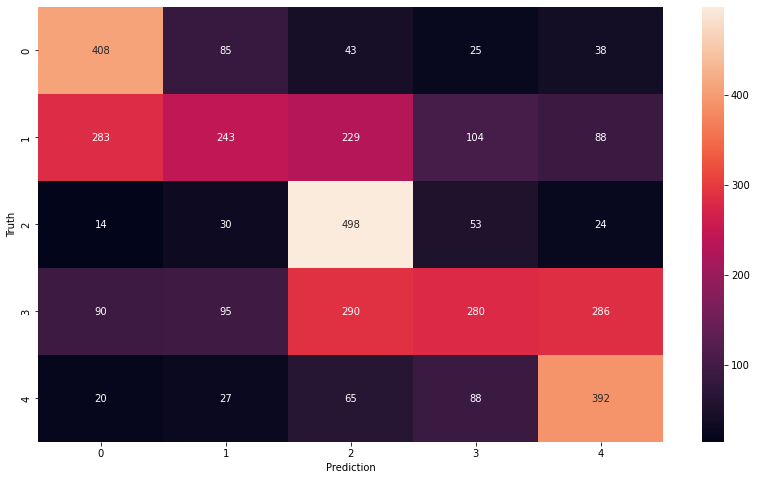

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (14,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')